Hola **Javier**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

 <font size="5"> **Descripción del proyecto:** </font>

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

  **Table of contents**<a id='toc0_'></a>
    - [Importación de librerias](#toc1_)
    - [Carga de datos](#toc2_)
    - [Exploración de datos](#toc3_)
    - [Correciones simples en nuestros datos](#toc4_)
    - [Analisis profundo de datos](#toc5_)
    - [Pruebas de hipotesis](#toc6_)
    - [Conclusiones finales](#toc7_)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por incluir esta sección introductoria a tu proyecto, esto da una mejor presentación y entendimiento del mismo
</div>

# <a id='toc1_'></a>[Importación de librerias](#toc1_)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import re

# <a id='toc2_'></a>[Carga de datos](#toc2_)

In [2]:
#Vamos a cargar correctamente nuestros datasets
df_company = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Carga de datos e importación de librerías correcto
</div>

# <a id='toc3_'></a>[Exploración de datos](#toc3_)

In [3]:
#Primero que nada, vamos a ver como se comportan los datos y analizar si presentan algun tipo de error
df_company.info()
df_company

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


Contamos con dos columnas en nuestro df_company:
 - company_name: Que es el nombre de la empresa de taxis
 - trips_amount: Que es el numero de viajes de cada compañia de taxis del 15 y 16 de noviembre del 2017.
 
  Podemos apreciar que la función info nos arroja información relevante de nuestro DF que no se puede apreciar a simple vista. Nuestro DF no parece contar con valores ausentes, vamos bien por ese lado ademas de que los tipos de datos o dtypes son coherentes con la información que estan manejando.

In [4]:
#Ahora vamos a analizar los datos de nuestro otro DF con el mismo procedimiento
df_neighborhoods.info()
df_neighborhoods

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


Como podemos observar, contamos con un dataframe similar al anterior en cuestion que no presenta datos ausentes y sus tipos de datos o dtypes son correspondientes a la información que maneja.

En este caso contamos con las columnas:
* dropoff_location_name: Que vienen siendo los diferentes varios de Chicago donde finalizaron los viajes.
* average_trips: Que viene siendo el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

# <a id='toc4_'></a>[Correciones simples en nuestros datos](#toc4_)

In [5]:
#Vamos analizar si existen datos duplicados en nuestro primer DF
df_company.duplicated().sum()

0

In [6]:
#Ahora vamos a analizar si existen datos duplicados de nuestro segundo DF
df_neighborhoods.duplicated().sum()

0

Como podemos observar, ninguno de los dos DF cuenta con datos duplicados, lo cual es una gran noticia ya que nos facilitara los procesos de analisis que se realizaran más adelante.

In [7]:
#Ahora vamos a ver los valores unicos con los que cuenta nuestro primer DF
df_company["company_name"].unique()

array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasing',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Association',
       'Checker Taxi Affiliation', 'Blue Diamond',
       'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United',
       'Chicago Independents', 'KOAM Taxi Association', 'Chicago Taxicab',
       'Top Cab Affiliation', 'Gold Coast Taxi',
       'Service Taxi Association', '5 Star Taxi', '303 Taxi',
       'Setare Inc', 'American United Taxi Affiliation', 'Leonard Cab Co',
       'Metro Jet Taxi A', 'Norshore Cab', '6742 - 83735 Tasha Ride Inc',
       '3591 - 63480 Chuks Cab', '1469 - 64126 Omar Jada'

A simple vista podemos observar que algunos nombres de compañia cuenta con numeros y guiones antes de su nombre. Puede que no perjudiquen a la hora de nuestros analisis pero si puede ser un problema a la hora de la visualización de resultados por que puede llegar a confundir. 

Asi que a continuación nos enfocaremos a eliminar esos numeros, guiones, etc que solo nos estorban y nos quedaremos unicamente con el texto.

In [8]:
#Para eliminar esos numeros y guiones, utilizaremos regex mediante una función
def numbers_replace(row):
    new_string = re.sub(r'\d* - \d*[ -]*','',row['company_name'])
    return new_string

In [9]:
#Una vez hecha nuestra pequeña función, vamos a aplicarla en nuestro DF
df_company.apply(numbers_replace,axis = 1)

0                           Flash Cab
1           Taxi Affiliation Services
2                   Medallion Leasing
3                          Yellow Cab
4     Taxi Affiliation Service Yellow
                   ...               
59                    Adwar H. Nikola
60                         Benny Jona
61                   Sergey Cab Corp.
62                        Felman Corp
63                     RC Andrews Cab
Length: 64, dtype: object

In [10]:
#Ya tenemos la función hecha y comprobamos que funciona, ya podemos reemplazar la columna por la que tiene solo texto
df_company['company_name'] = df_company.apply(numbers_replace,axis = 1)

In [11]:
#Comprobamos que se aplicaron adecuadamente los cambios
df_company['company_name'].unique()

array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasing',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Association',
       'Checker Taxi Affiliation', 'Blue Diamond',
       'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United',
       'Chicago Independents', 'KOAM Taxi Association', 'Chicago Taxicab',
       'Top Cab Affiliation', 'Gold Coast Taxi',
       'Service Taxi Association', '5 Star Taxi', '303 Taxi',
       'Setare Inc', 'American United Taxi Affiliation', 'Leonard Cab Co',
       'Metro Jet Taxi A', 'Norshore Cab', 'Tasha Ride Inc', 'Chuks Cab',
       'Omar Jada', 'Luhak Corp', 'Godfrey S. Awir',
    

Efectivamente, ya la información se ve mucho mejor y más accesible a la vista.

In [12]:
#Verifiquemos los datos unicos de nuestro segundo DF
df_neighborhoods['dropoff_location_name'].unique()

array(['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare",
       'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast',
       'Sheffield & DePaul', 'Lincoln Park', 'East Village',
       'Little Italy, UIC', 'Uptown', 'Near South Side', 'Garfield Ridge',
       'Logan Square', 'Edgewater', 'West Town', 'Old Town',
       'Rush & Division', 'North Center', 'Lincoln Square', 'Rogers Park',
       'West Ridge', 'Irving Park', 'Hyde Park', 'Avondale',
       'Wicker Park', 'Albany Park', 'United Center', 'Lower West Side',
       'Douglas', 'Portage Park', 'Humboldt Park', 'Norwood Park',
       'Kenwood', 'Bridgeport', 'Armour Square', 'Jefferson Park',
       'Bucktown', 'North Park', 'Garfield Park', 'Mckinley Park',
       'Belmont Cragin', 'Boystown', 'Chinatown', 'Grand Boulevard',
       'Austin', 'Sauganash,Forest Glen', 'South Shore', 'Woodlawn',
       'Little Village', 'Jackson Park', 'North Lawndale', 'Dunning',
       'Ukrainian Village', 'Hermosa', 'Englewood'

Este DF cuenta con información accesible y ordenada de manera correcta.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Siempre se debe analizar los datos con los que se trabajará y realizar el procesamiento adecuado para tener métricas más acertadas
</div>

# <a id='toc5_'></a>[Analisis profundo de datos](#toc5_)

Nuestro objetivo ahora, es identificar cuales son nuestros TOP 10 de compañias y barrios de los diferentes DF.

In [13]:
#Vamos a ver como se distribuyen nuestros datos en nuestro primer DF
df_company['trips_amount'].describe().reset_index()

,index,trips_amount
0,count,64.000000
1,mean,2145.484375
2,std,3812.310186
3,min,2.000000
4,25%,20.750000
5,50%,178.500000
6,75%,2106.500000
7,max,19558.000000


Podemos observar que tanto el promedio, cuartiles, desviación estandar y el maximo cuentan con una clara incidencia sobre los datos por diferentes empresas. Esto da como resultado que los valores sean muy altos y poco comunes.

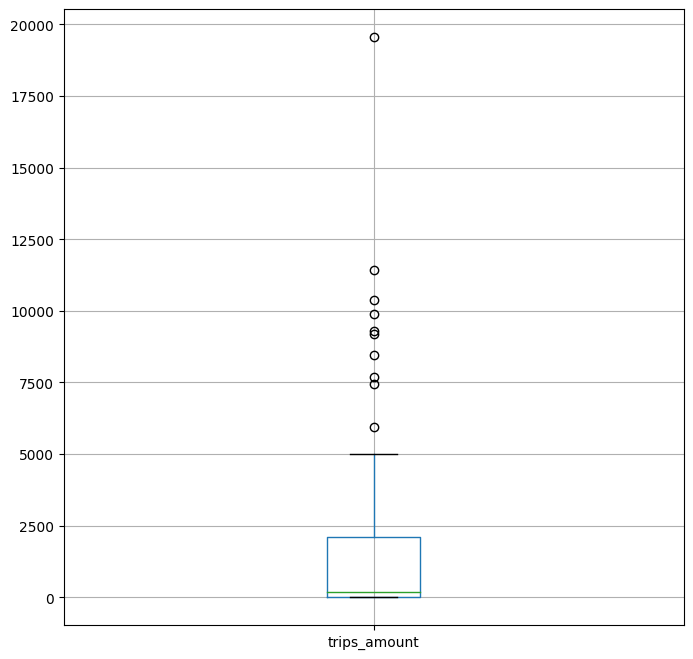

In [14]:
#Ahora vamos a crear un boxplot que nos muestre la distribución de los valores de una manera más completa
df_company.boxplot('trips_amount',figsize=(8,8))
plt.show()

Como podemos observar en la grafica, es sorprendente como una empresa esta por muy encima de las demas. Podemos ver que la diferencia de viajes es de más de 5000. Mientras que las otras empresas se encuentran similares en base a la media.

In [15]:
#Ahora, gracias a la tabla de nuestro DF ordenada podemos sacar el TOP 10 de compañias
df_company.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


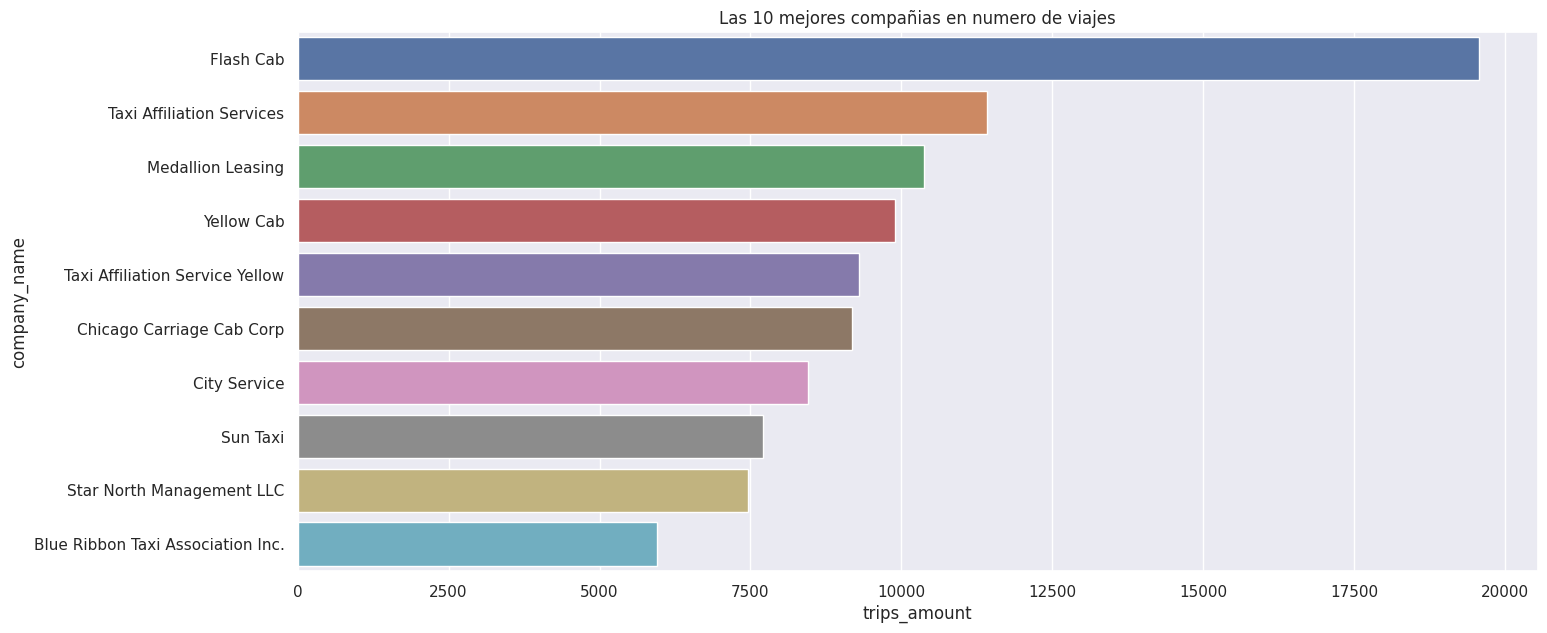

In [16]:
#Ahora, con esta información vamos a crear una grafica para que se aprecie de mejor manera
data = df_company.head(10)

sns.set(rc={'figure.figsize':(16,7)})

sns.barplot(data= data, x='trips_amount',y='company_name',orient='h').set(title='Las 10 mejores compañias en numero de viajes')
sns.set_style("whitegrid")
plt.show()

Aqui se puede apreciar más claro la notable ventaja o diferencia que tiene la compañia top 1 a comparación de las demas. La compañia "Flash Cab" es la que destaca ante todas las demas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, analizaste de manera adecuada lo referente a companías
</div>

**A continuación vamos a hacer el mismo procedimiento pero para el segundo DF**

In [17]:
#Vamos a ver como se distribuyen nuestros datos en nuestro segundo DF
df_neighborhoods['average_trips'].describe().reset_index()

,index,average_trips
0,count,94.000000
1,mean,599.953728
2,std,1714.591098
3,min,1.800000
4,25%,14.266667
5,50%,52.016667
6,75%,298.858333
7,max,10727.466667


Como podemos observar se nota que ciertos barrios son más populares que otros, eso se puede determinar ya que la Media es mucho mayor a la Mediana. Ademas de que la Varianza Estandar tambien este encima del promedio.

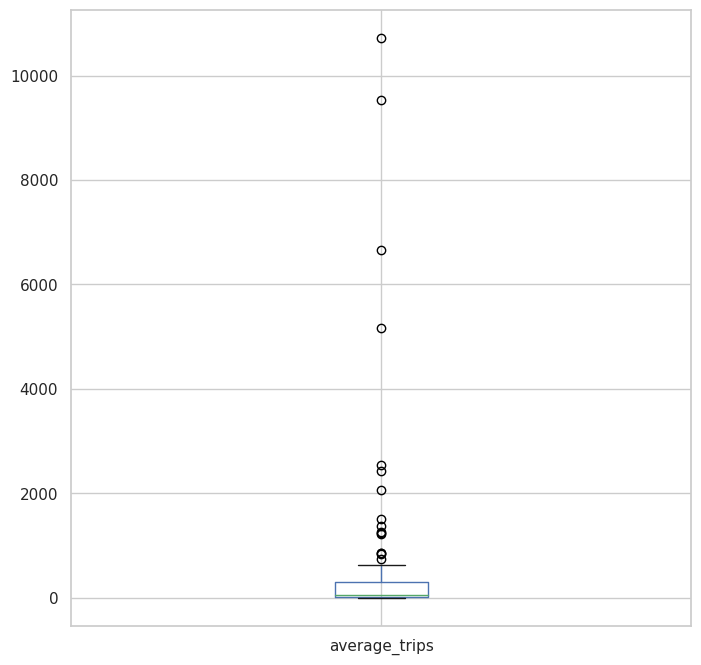

In [18]:
#Ahora vamos a crear un boxplot que nos muestre la distribución de los valores de una manera más completa
df_neighborhoods['average_trips'].plot.box(figsize=(8,8))
plt.show()

Pasa similar al primer DF, hay barrios que destacan mucho más que los demas por mucho.

In [19]:
#Ahora, gracias a la tabla de nuestro DF ordenada podemos sacar el TOP 10 de los barrios de Chicago
df_neighborhoods.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


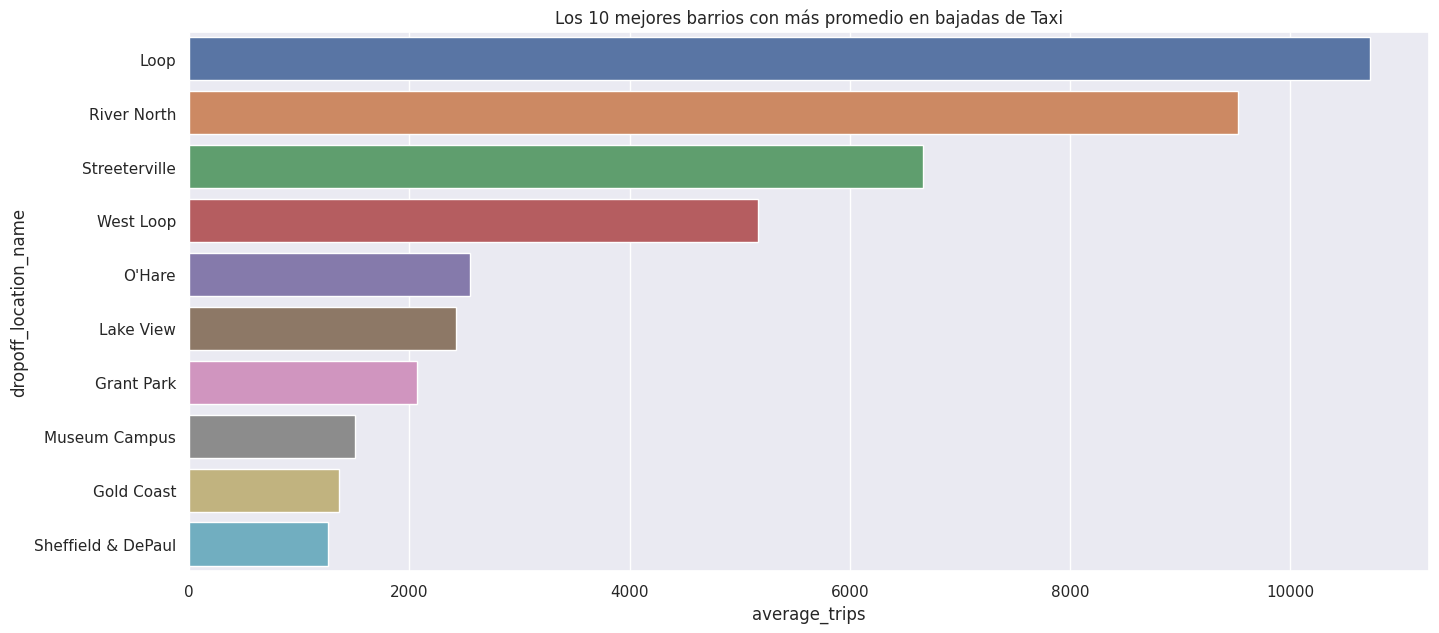

In [20]:
#Ahora, con esta información vamos a crear una grafica para que se aprecie de mejor manera
data = df_neighborhoods.head(10)

sns.set(rc={'figure.figsize':(16,7)})

sns.barplot(data= data, x='average_trips',y='dropoff_location_name',orient='h').set(title='Los 10 mejores barrios con más promedio en bajadas de Taxi')
sns.set_style("whitegrid")
plt.show()

Aqui podemos observar con mayor detalle que el barrio "Loop" con una pequeña diferencia se posiciona arriba de "River North". Esto se debe a que el barrio de "Loop" cuenta con grandes lugares turisticos que predominan en comparación de los demas lo que hace que en esas zonas sea muy solicitado utilizar Taxis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente, realizaste gráficas súper claras con análisis adecuados de las mismas
</div>

# <a id='toc6_'></a>[Pruebas de hipotesis](#toc6_)

Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:

**cómo planteaste las hipótesis nula y alternativa**

**qué criterio usaste para probar las hipótesis y por qué**

In [21]:
#Para este proceso, debemos de cargar nuevos datos proporcionados y crear un DF
df_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te recomiendo siempre realizar la carga de tus datos al inicio del notebook, para tener un mejor órden y evitar confusiones
</div>

In [22]:
#Ahora vamos a ver el contenido de la tabla
df_weather.info()
df_weather

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


La mayoria de los datos se ven normales a excepción de uno que se encuentra en la fila 1063 que nos da una duración de 0 segundos.

In [23]:
#Vamos a buscar más filas que presenten la misma duración de 0 segundos
df_weather.loc[df_weather.duration_seconds == 0]

,start_ts,weather_conditions,duration_seconds
163,2017-11-11 09:00:00,Good,0.0
168,2017-11-11 07:00:00,Good,0.0
204,2017-11-18 19:00:00,Good,0.0
552,2017-11-04 01:00:00,Good,0.0
801,2017-11-04 09:00:00,Good,0.0
1063,2017-11-25 11:00:00,Good,0.0


Como lo sospechabamos, nos encontramos con 6 viajes que cuentan con una duración de 0 segundos. Esto puede deberse a muchas razones, como que el viaje fue cancelado, error a la hora de cargar los datos, entre muchos más. Por ahora considero que lo mejor seria eliminarlos para que no nos perjudique mucho a la hora de realizar las Pruebas de Hipotesis.

In [24]:
#Eliminaremos las filaes de manera manual
df_weather.drop(index=[163,168,204,552,801,1063],inplace=True)

In [25]:
#Hay que verificar que se eliminaron correctamente
df_weather.loc[df_weather.duration_seconds == 0]

,start_ts,weather_conditions,duration_seconds


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizada esa limpieza! 
</div>

In [26]:
#Una vez teniendo nuestros datos limpios, podemos obtener dos tablas dependiendo de las condiciones del clima
good_weather = df_weather.loc[df_weather.weather_conditions == 'Good']
bad_weather = df_weather.loc[df_weather.weather_conditions == 'Bad']

In [27]:
#Vamos analizar la primer tabla donde la condición del clima es buena
good_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 1066
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            882 non-null    object 
 1   weather_conditions  882 non-null    object 
 2   duration_seconds    882 non-null    float64
dtypes: float64(1), object(2)
memory usage: 27.6+ KB


Teniendo esta información, ya que necesitamos que nuestras pruebas de hipotesis sean precisas, vamos a buscar Valores Atipicos dentro de las tablas las pueden interferir en nuestros análisis.

In [28]:
def remove_outliers(df,column:str): #Con esta sintaxis vamos a entregar el DF y la columna que necesitamos modificar
    
    mean =  df[column].mean()
    
    std = df[column].std()
    
    z_scores = ((df[column] - mean)/std).abs()
    
    inliers_map = z_scores<=3
    
    inliers_df = df[inliers_map]
    
    return inliers_df

Con la formula anterior determinamos nuestro media, desviacion estandar y establecimos el valor de nuestro Z_scores para que los que sean menores o iguales a 3 sean eliminados.

In [29]:
#Una vez establecida la formula, vamos a probarla en nuestras tablas de condiciones de clima
remove_outliers(good_weather,'duration_seconds')

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0
1062,2017-11-11 06:00:00,Good,1500.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, siempre es importante tener en cuenta los valores atípicos ya que estos pueden alterar las métricas que se calculen e incluso los resultados en las pruebas estadísticas
</div>

Nos devolvio 877 filas, lo cual significa que fueron muy pocos los valores atipicos que elimino. De esta manera podemos proceder a utilizar esta información para nuestra prueba de hipotesis ya que contamos con información lo más precisa que se puede.

In [30]:
#Actualizamos nuestra tabla de condiciones de clima buenas
good_weather = remove_outliers(good_weather,'duration_seconds')

In [31]:
#Revisamos nuestra otra tabla
bad_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            180 non-null    object 
 1   weather_conditions  180 non-null    object 
 2   duration_seconds    180 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.6+ KB


In [32]:
#Y aplicamos el mismo procedicimiento con la otra tabla de condiciones de clima malas
remove_outliers(bad_weather,'duration_seconds')

,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969.0
30,2017-11-18 12:00:00,Bad,1980.0
34,2017-11-04 17:00:00,Bad,2460.0
51,2017-11-04 16:00:00,Bad,2760.0
52,2017-11-18 12:00:00,Bad,2460.0
...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0
1032,2017-11-18 10:00:00,Bad,1908.0
1053,2017-11-18 12:00:00,Bad,2400.0
1061,2017-11-18 16:00:00,Bad,2186.0


In [33]:
#Y actualizamos nuestra tabla libre de valores atipicos
bad_weather = remove_outliers(bad_weather,'duration_seconds')

Por la cantidad de datos que tenemos en la tabla de "good_weather" a comparación de la tabla de "bad_weather" nos da a entender que la gran mayoria de los dias hubo un muy buen clima en la ciudad.

**Ya que tenemos nuestros datos precisos, ya podemos proceder a realizar nuestra prueba de hipotesis:**

A continuación vamos a definir la hipótesis nula y la alternativa de la siguiente manera:

*H0: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.*

*H1: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.*

Por ultimo nos queda definir nuestro factor de significancia alpha, el cual vamos a determinar como 0.05

Antes de empezar con nuestras pruebas de hipotesis, ya que estamos tratando con dos conjuntos de datos podemos utilizar la funcion "ttest_ind" aunque antes tendríamos que verificar si los conjuntos de datos poseen varianzas estadisticamente iguales o no.

In [34]:
#Antes de empezar vamos a guardar en dos variables diferentes las dos tablas que vamos a comparar
good_weather_data = good_weather['duration_seconds']
bad_weather_data = bad_weather['duration_seconds']

In [35]:
#Teniendo nuestros datos en variables diferentes, vamos a realizar la prueba de Levanue para analizar si estos conjuntos de datos poseen varianzas estadisticamente iguales o no

alpha = 0.05

results = st.levene(good_weather_data,bad_weather_data)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Las varianzas son estadisticamente diferentes')
else:
    print("No podemos afirmar que las varianzas son estadisticamente diferentes")

p-value:  0.7888178851804917
No podemos afirmar que las varianzas son estadisticamente diferentes


In [36]:
# Ya que realizamos la prueba y dios como resultados que las varianzas son similares, ya podemos realizar nuestra prueba de hipotesis antes mencionada
alpha = 0.05

# Ya que nos dijo anteriormente que las varianzas no son diferentes, entonces establecemos el parámetro equal_var como True
results = st.ttest_ind(good_weather_data, bad_weather_data, equal_var=True)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

p-value:  2.3968233040077725e-13
Rechazamos la hipótesis nula


Como podemos observar, la prueba de hipotesis nos rechazo la hipotesis nula. Lo cual significa que "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos". Obviamente depende mucho ya que hay personas que les da igual el clima, a ellos les interesa llegar a su destino pero es bueno saber que la gran mayoria prefiere no arriesgarse ese dia por el clima que hay en ese barrio en especifico.

# <a id='toc7_'></a>[Conclusiones finales](#toc7_)

Antes de realizar todo este análisis, pudimos utilizar las herramientas que nos otorga SQL, de esta manera desarrollamos lo aprendido en este sprint. Utilizamos diferentes maneras de unir tablas y datos en una misma linea de codigo de SQL esto con el fin de organizar nuestra información

Ya luego pasamos a realizar un análisis con el lenguaje Python, el cual ya estamos acostumbrados y a este paso ya realizamos los diferentes procedimientos ya casi por inercia o costumbre.

Durante el análisis nos topamos con pocos datos a comparación de otros proyectos realizados, los cuales me sorprendio mucho que no contara con valores ausentes o valores duplicados. Lo cual de esta manera nos facilito mucho el proceso de análisis.

Una vez realizado el análisis, nos dimos cuenta que en el DF de Compañias, dominaba por mucha la compañoa llamada "Flash Cab". la cual era la más popular de la ciudad de Chicago. Practicamente las demas compañias no podrian competir contra la TOP 1, ya si hablamos de los TOP 2,3 y 4 ahi los resultados si estaban reñidos y practicamente competian entre ellas.

Ahora, si hablamos del otro DF que vienen siendo los barrios de la ciudad de Chicago, pudimos observar que el TOP 1 "Loop" destaco mucho por el simple hecho de tener mucho más lugares turisticos que el resto, lo cual hacia que muchas personas utilizaran como medio de transporte el Taxi. Pero a diferencia de los demas barrios, no existia una diferencia descomunal como en el otro DF.

Y por ultimo, en nuestra prueba de hipotesis nos otorgo un p-value muy pequeño, el cual nos da como resultado rechazar la hipotesis nula que nos da a entender que por culpa del clima y por no arriesgarse, la duración de los viajes es mucho menor a comparación de que no este lloviendo los dias sabados.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por el trabajo realizado! Analizaste y mostraste gráficas súper claras para el objetivo de este proyecto, además demostraste un manejo súper bueno del concepto de las pruebas de hipótesis lo cual es un punto importante cuando en tu vida laboral estés realizando pruebas AB ya que la decisión final debe estar argumentada con una prueba de hipótesis para decidir que grupo experimental está teniendo mejor desempeño. Buen trabajo!
</div>